# Simulating Meteor strike Economic Impact on Bank Transactions
Purpose of this workbook is to generate a nother data set to simulate the effects of a meteor striking the nothtern part of Spain on the data set.

In [ ]:
### 1) Import relevant libraries

In [102]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statistics import mean




### 2) Read in cleaned version of the original dataset
The original dataset was used to train the recommendation system in `logistic_regression.py`

In [32]:
print("Current Working Directory:", os.getcwd()) 

# Define file paths for training and testing data
file_path_train = os.path.join("../..", "artifacts", "reco_sys_train_data.csv")  
file_path_test = os.path.join("../..", "artifacts", "reco_sys_test_data.csv")  

# Print the paths to verify
print("Training Data Path:", file_path_train)
print("Testing Data Path:", file_path_test)

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)



### Data manipulation
Here we manipulate only two columns:
- gross_income
- deceased_index 

Due to a meteor strike, the 2 variables that change the most will be the gross_income which can vary quite a bit due to some pay cuts or loss of jobs as their workplace is either no longer around or the company that they work at is affected by the meteor.

For the deceased_index, it increases significantly as most will die from the meteor strike in the northern region.


Setting seed

In [ ]:
np.random.seed(1000)

Part 1: Manipulate gross income of customers

In [103]:
def manipulate_gross_income(df,percentage):
    # decrease of 10% of overall income
    lambda_inv = mean(df['gross_income'])*(percentage)

    gross_income_dec = np.random.exponential(scale=lambda_inv, size = len(df))
    final_income = []
    for i in range(0,len(df)):
        inc = df['gross_income'].iloc[i]-gross_income_dec[i]
        if inc<0:
            final_income.append(0)
        else:
            final_income.append(inc)
    return final_income

Part 2: Manipulate deceased_index of customers

In [104]:
def manipulate_deceased_index(df,percentage):
    new_deceased = []
    for i in range(0,len(df)):
        if df['deceased_index_S'].iloc[i] == 0 and df['region_NORTH'].iloc[i] == 1:
            if(np.random.rand()<(percentage)):
                new_deceased.append(1)
            else:
                new_deceased.append(0)
        else:
           new_deceased.append(0)

    return new_deceased
    

In [105]:
# data transformation train Meteor
#input_file = "clean_train_reco.csv" # input CSV file
output_file = "clean_train_reco_meteor.csv" # output CSV file

In [106]:
#df_train = pd.read_csv(input_file)

Train dataset before transformations

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_train.columns.to_list()
df_train.head()

Distribution of gross income for train data

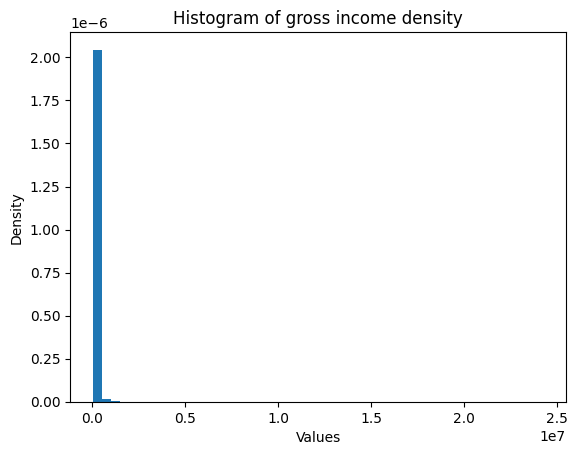

In [107]:
#meteor dropped on north region of spain 

#overall decreaseof 20% of economy immediately

#histogram of gross income
plt.hist(df_train['gross_income'],bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of gross income density')
plt.show() 
#results is an exponential
np.random.seed(1000)

## Decrease of 20% of overall income for train

In [108]:
new_income = manipulate_gross_income(df_train,2/10)
df_train['gross_income'] = new_income

## 90% of residents in the Northern region died. The 10% are those who were not in the region when the meteor struck for train

In [109]:
new_deceased_index = manipulate_deceased_index(df_train,0.9)
df_train['deceased_index_S'] = new_deceased_index

Train dataset after transformations 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_train.columns.to_list()
df_train.head()

In [110]:
df_train.to_csv(output_file, index=False)

In [111]:
# data transformation test Covid
#input_file = "clean_test_reco.csv" # input CSV file
output_file = "clean_test_reco_meteor.csv" # output CSV file



In [112]:
#df_test = pd.read_csv(input_file)

In [ ]:
Test dataset before transformations 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_test.columns.to_list()
df_test.head()

Distribution of gross income for test data

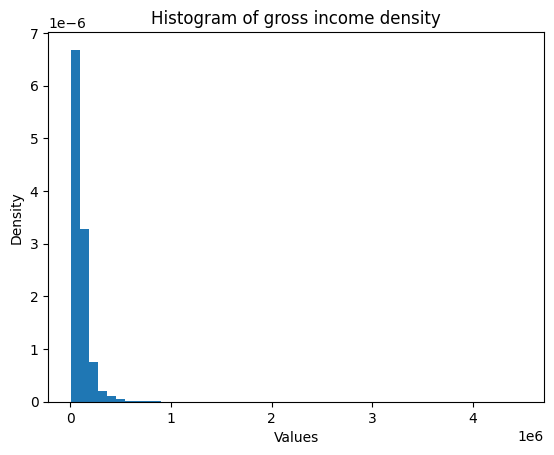

In [114]:
#meteor dropped on north region of spain 

#overall decreaseof 20% of economy immediately

#histogram of gross income
plt.hist(df_test['gross_income'],bins = 50, density=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of gross income density')
plt.show() 
#results is an exponential
np.random.seed(1000)

## Decrease of 20% of overall income for test

In [116]:
new_income = manipulate_gross_income(df_test,2/10)
df_test['gross_income'] = new_income

## 90% of residents in the Northern region died. The 10% are those who were not in the region when the meteor struck for test

In [118]:
new_deceased_index = manipulate_deceased_index(df_test,0.9)
df_test['deceased_index_S'] = new_deceased_index

Train dataset after transformations 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Prevent wrapping of columns
df_test.columns.to_list()
df_test.head()

In [119]:
df_test.to_csv("clean_test_reco_meteor.csv", index=False)